In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


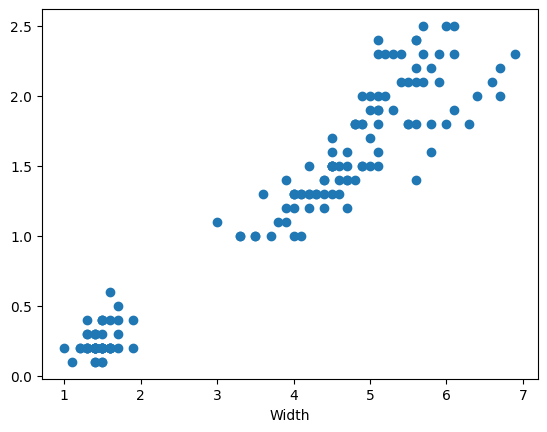

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Length");plt.xlabel("Width");
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
df['clusters'] = y_predicted
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


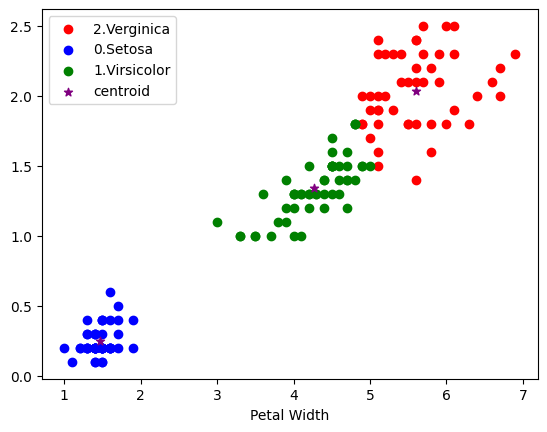

In [19]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]

plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color='red',label='2.Verginica')
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color='blue',label='0.Setosa')
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color='green',label='1.Virsicolor')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("Petal Length");plt.xlabel("Petal Width");
plt.legend()

In [7]:
df2[df2["petal width (cm)"]==1.8]

,petal length (cm),petal width (cm),clusters
70,4.8,1.8,2
126,4.8,1.8,2
138,4.8,1.8,2


In [8]:
iris.target[138]

2

In [9]:
#elbow plot

In [10]:
sse = []
for i in range(1,10):
    k = KMeans(n_clusters=i)
    k.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(k.inertia_)

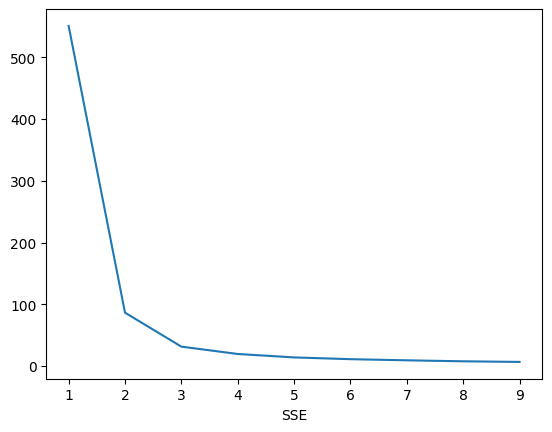

In [11]:
plt.xlabel("K");plt.xlabel("SSE");
plt.plot(range(1,10),sse)

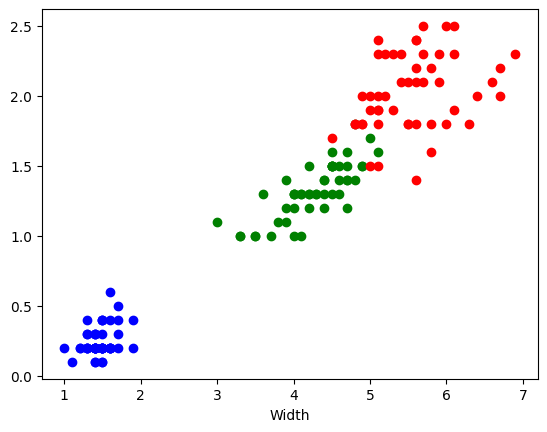

In [18]:
d = pd.DataFrame(iris.data,columns=iris.feature_names)
d['target']=iris.target
d5 = d[d.target==0]
d6 = d[d.target==1]
d7 = d[d.target==2]
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Length");plt.xlabel("Width");
plt.scatter(d5["petal length (cm)"],d5["petal width (cm)"],color='blue')
plt.scatter(d6["petal length (cm)"],d6["petal width (cm)"],color='green')
plt.scatter(d7["petal length (cm)"],d7["petal width (cm)"],color='red')